# Classification : Customer Churn Prediction (Logistic Rrgression)

In [1]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

In [2]:
#import dataset
df = pd.read_csv("dqlab_telco_final.csv")

#Tampilkan bentuk dari dataset
print(df.shape)

(6950, 13)


In [3]:
#Tampilkan 5 data teratas
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [4]:
#Tampilkan jumlah ID yang unik
df.customerID.nunique()

6950

In [5]:
#Tampilkan info setiap variabel
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


# Exploratory Data Analysis

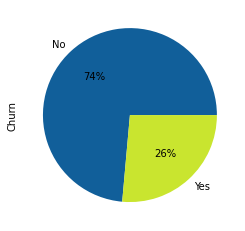

In [6]:
df.Churn.value_counts().plot(kind='pie', autopct='%1.0f%%', colors = ['#115F9A', '#C9E52F'])
plt.show()

## Exploratory Data Analysis (EDA) Variabel Numerik
Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df` untuk di olah di tahap ini dan gunakan fungsi `subplots()` untuk membuat gambar dan satu set subplot.

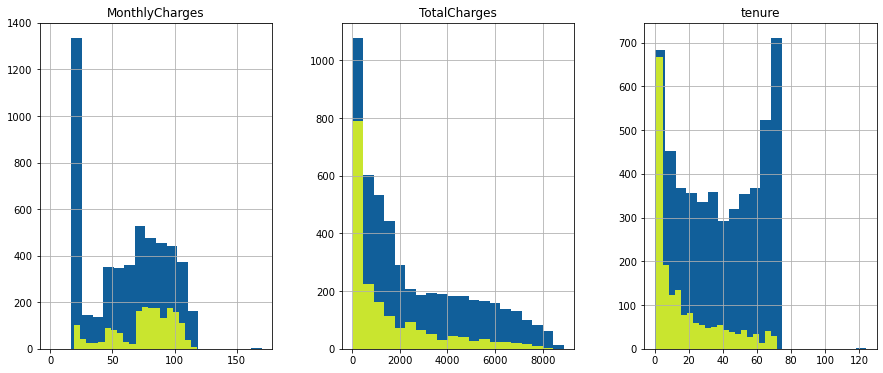

In [8]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and green, respectively
df[df.Churn == 'No'][numerical_features].hist(bins=20, color='#115F9A', ax=ax) 
df[df.Churn == 'Yes'][numerical_features].hist(bins=20, color='#C9E52F', ax=ax)
plt.show()

## Exploratory Data Analysis (EDA) Variabel Kategorik
Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df` untuk di olah di tahap ini. Gunakan fungsi `countplot()` untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

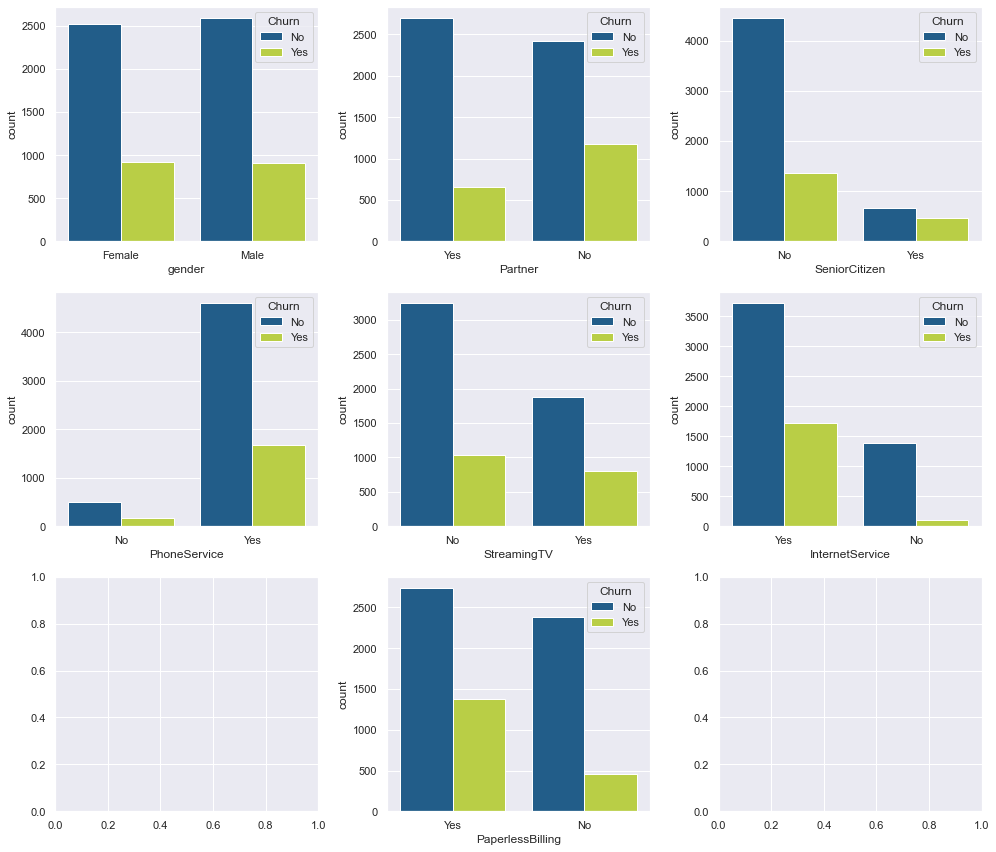

In [11]:
sns.set(style='darkgrid')
colors = ['#115F9A', '#C9E52F']

fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0], palette=colors)
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1], palette=colors)
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][2], palette=colors)
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0], palette=colors)
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1], palette=colors)
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2], palette=colors)
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1], palette=colors)
plt.tight_layout()
plt.show()

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

1. dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detail Churn sebanyak 26% dan No Churn sebanyak 74%.

2. dapat kita ketahui bahwa:
    - untuk `MonthlyCharges` ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. 
    - Untuk `TotalCharges` terlihat tidak ada kecenderungan apapun terhadap Churn customers. 
    - Untuk `tenure` ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
    

3. dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin `(gender)`. Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah:
    - orang-orang yang tidak memiliki partner `(partner: No)`, 
    - orang-orang yang statusnya adalah bukan senior citizen`(SeniorCitizen: No)`, 
    - orang-orang yang mempunyai layanan telefon `(PhoneService: Yes)`,
    - orang-orang yang mempunyai layanan streaming TV `(StreamingTV: No)`, 
    - orang-orang yang mempunyai layanan Internet `(internetService: Yes)` dan 
    - orang-orang yang tagihannya paperless `(PaperlessBilling: Yes)`.

## Menghapus Unnecessary Columns dari data

In [30]:
cleaned_df = df.drop(['customerID','UpdatedAt'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [31]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
	if cleaned_df[column].dtype == np.number: continue
	# Perform encoding for each non-numeric column
	cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print(cleaned_df.describe())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5588\2974748277.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if cleaned_df[column].dtype == np.number: continue


            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

# Splitting Dataset

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (X) dan targetnya (Y). Gunakan train_test_split() untuk membagi data tersebut. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi x_train, y_train, x_test & y_test

In [32]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis = 1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Persentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Persentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Persentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Persentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


# Model Building

In [34]:
log_model = LogisticRegression().fit(x_train,y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression()


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluasi Model - Menampilkan Metrics

In [35]:
# Predict
y_train_pred = log_model.predict(x_train)

# Print classification report
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.79      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.79      0.79      4865



In [38]:
print(confusion_matrix(y_train, y_train_pred))

[[3221  354]
 [ 644  646]]


In [39]:
print('Classification Report Test Model (Logistic Regression) :')
print(classification_report(y_test, log_model.predict(x_test)))

Classification Report Test Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.49      0.56       546

    accuracy                           0.80      2085
   macro avg       0.74      0.70      0.71      2085
weighted avg       0.78      0.80      0.79      2085



In [41]:
print(confusion_matrix(y_test, log_model.predict(x_test)))

[[1390  149]
 [ 278  268]]
